## 通し課題➀ クラス分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### 1. データの読み込み

In [2]:
# deadlineとlaunchedはdatetime型で読み込む
df = pd.read_csv('input/ks-projects-201801.csv', parse_dates=['deadline', 'launched'])

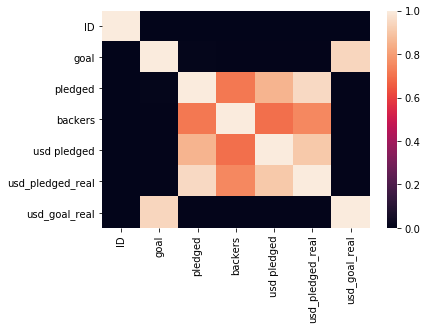

In [3]:
display(df.head(8))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00


In [4]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 43.3+ MB


None

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
# state列が取る値を確認
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [6]:
# state列のsuccessfulを1、それ以外を0に割り振る
state_mapping = {'failed': 0, 'canceled': 0, 'live': 0, 'undefined': 0, 'suspended': 0, 'successful': 1}
df['state'] = df['state'].map(state_mapping)

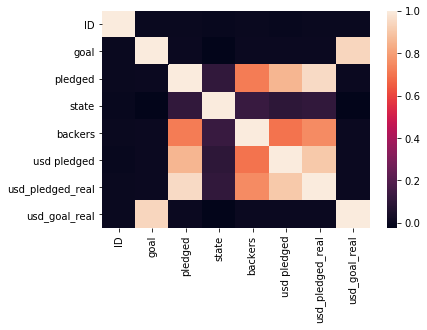

In [7]:
sns.heatmap(df.corr())
plt.show()

In [8]:
# datetime型の列を数値として扱えるようにする
df = df.assign(
    launched_year=df['launched'].dt.year, 
    launched_month=df['launched'].dt.month, 
    launched_day=df['launched'].dt.day, 
    launched_hour=df['launched'].dt.hour
    )
df = df.assign(
    deadline_year=df['deadline'].dt.year, 
    deadline_month=df['deadline'].dt.month, 
    deadline_day=df['deadline'].dt.day, 
    deadline_hour=df['deadline'].dt.hour
    )
df.drop(['launched', 'deadline'], axis=1, inplace=True)
df.head(8)

,ID,name,category,main_category,currency,goal,pledged,state,backers,country,...,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,launched_hour,deadline_year,deadline_month,deadline_day,deadline_hour
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,0,0,GB,...,0.0,1533.95,2015,8,11,12,2015,10,9,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,0,15,US,...,2421.0,30000.00,2017,9,2,4,2017,11,1,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,0,3,US,...,220.0,45000.00,2013,1,12,0,2013,2,26,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,0,1,US,...,1.0,5000.00,2012,3,17,3,2012,4,16,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,1283.0,0,14,US,...,1283.0,19500.00,2015,7,4,8,2015,8,29,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,52375.0,1,224,US,...,52375.0,50000.00,2016,2,26,13,2016,4,1,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,1000.0,1205.0,1,16,US,...,1205.0,1000.00,2014,12,1,18,2014,12,21,0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,25000.0,453.0,0,40,US,...,453.0,25000.00,2016,2,1,20,2016,3,17,0


In [9]:
# 目的変数と無関係そうな列を削除する
drop_columns_list = ['ID', 'name']
df.drop(drop_columns_list, axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_feature = ['category', 'main_category', 'currency', 'country']
df[categorical_feature] = df[categorical_feature].apply(encoder.fit_transform)

In [11]:
df.head(8)

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_day,launched_hour,deadline_year,deadline_month,deadline_day,deadline_hour
0,108,12,5,1000.0,0.0,0,0,9,0.0,0.0,1533.95,2015,8,11,12,2015,10,9,0
1,93,6,13,30000.0,2421.0,0,15,22,100.0,2421.0,30000.00,2017,9,2,4,2017,11,1,0
2,93,6,13,45000.0,220.0,0,3,22,220.0,220.0,45000.00,2013,1,12,0,2013,2,26,0
3,90,10,13,5000.0,1.0,0,1,22,1.0,1.0,5000.00,2012,3,17,3,2012,4,16,0
4,55,6,13,19500.0,1283.0,0,14,22,1283.0,1283.0,19500.00,2015,7,4,8,2015,8,29,0
5,123,7,13,50000.0,52375.0,1,224,22,52375.0,52375.0,50000.00,2016,2,26,13,2016,4,1,0
6,58,7,13,1000.0,1205.0,1,16,22,1205.0,1205.0,1000.00,2014,12,1,18,2014,12,21,0
7,41,7,13,25000.0,453.0,0,40,22,453.0,453.0,25000.00,2016,2,1,20,2016,3,17,0


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df_house['state'].values
X = df_house.drop('state', axis=1).values

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=2020, tol=1e-3, )
clf.fit(X_scaled, y)